# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [2]:
cat=Table.read('./data/dmu26_XID+SPIRE_AKARI-NEP_cat.fits')


In [3]:
cat[0:10]

HELP_ID,RA,Dec,F_SPIRE_250,FErr_SPIRE_250_u,FErr_SPIRE_250_l,F_SPIRE_350,FErr_SPIRE_350_u,FErr_SPIRE_350_l,F_SPIRE_500,FErr_SPIRE_500_u,FErr_SPIRE_500_l,Bkg_SPIRE_250,Bkg_SPIRE_350,Bkg_SPIRE_500,Sig_conf_SPIRE_250,Sig_conf_SPIRE_350,Sig_conf_SPIRE_500,Rhat_SPIRE_250,Rhat_SPIRE_350,Rhat_SPIRE_500,n_eff_SPIRE_250,n_eff_SPIRE_500,n_eff_SPIRE_350,Pval_res_250,Pval_res_350,Pval_res_500
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,,,,
bytes27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J181342.788+665941.183,273.428282281287,66.99477303217739,1.7848489,3.971337,0.47635245,1.3548231,3.3918803,0.3667662,0.8717488,2.2262366,0.2235659,4.1593843,2.0529962,-0.15017398,6.54837,6.619338,0.11088082,0.99838275,0.99877864,0.9997355,2000.0,2000.0,2000.0,0.002,0.055,0.016
HELP_J181342.982+665955.952,273.429091821287,66.9988756521774,2.1317763,5.0484767,0.5894682,1.5267067,3.9442747,0.37286758,1.0475153,2.653688,0.25602478,4.1593843,2.0529962,-0.15017398,6.54837,6.619338,0.11088082,0.9992319,0.99947315,0.9989533,2000.0,2000.0,2000.0,0.0,0.021,0.016
HELP_J181416.006+665941.274,273.566691051287,66.9947982121774,1.8718276,4.371539,0.50439346,4.9632034,9.160477,1.6601055,1.9153067,3.4007857,0.64695376,4.1593843,2.0529962,-0.15017398,6.54837,6.619338,0.11088082,1.0000905,0.9999223,1.0000621,2000.0,2000.0,2000.0,1.0,0.999,0.0
HELP_J181406.396+670016.071,273.526650511287,67.0044642821774,4.6532764,9.483677,1.5745945,2.2114093,5.253553,0.6591029,2.0325844,3.739483,0.7421709,4.1593843,2.0529962,-0.15017398,6.54837,6.619338,0.11088082,0.9987711,0.9993362,0.99966764,2000.0,2000.0,2000.0,0.987,0.461,0.0
HELP_J181410.475+670101.991,273.543645241287,67.0172197721774,4.0015864,8.3385315,1.3242911,2.5570242,5.820967,0.775733,0.6797049,1.5031763,0.19922945,4.1593843,2.0529962,-0.15017398,6.54837,6.619338,0.11088082,0.9997318,0.99911696,1.0008358,2000.0,2000.0,2000.0,0.952,0.976,0.0
HELP_J181356.589+665958.571,273.485787131287,66.9996029321774,4.195308,8.560259,1.1426964,5.660888,11.840233,1.6910348,1.6302073,4.0473137,0.4584071,4.1593843,2.0529962,-0.15017398,6.54837,6.619338,0.11088082,0.99902934,0.99946207,0.99923205,2000.0,2000.0,2000.0,0.151,0.001,0.0
HELP_J181352.053+670002.340,273.466885931287,67.00065005217739,2.7638113,6.230364,0.68461204,2.3807912,5.48982,0.6394832,1.0821389,2.773186,0.2738613,4.1593843,2.0529962,-0.15017398,6.54837,6.619338,0.11088082,0.9985592,0.9982926,0.9982712,2000.0,2000.0,2000.0,0.001,0.004,0.006
HELP_J181353.688+665948.815,273.473698831287,66.9968929821774,2.295473,5.4403057,0.53387845,1.9138602,4.5674186,0.51287,1.035124,2.5197945,0.25564268,4.1593843,2.0529962,-0.15017398,6.54837,6.619338,0.11088082,0.99945104,0.9983174,0.99832445,2000.0,2000.0,2000.0,0.003,0.004,0.008


## Look at Symmetry of PDFs to determine depth level of catalogue

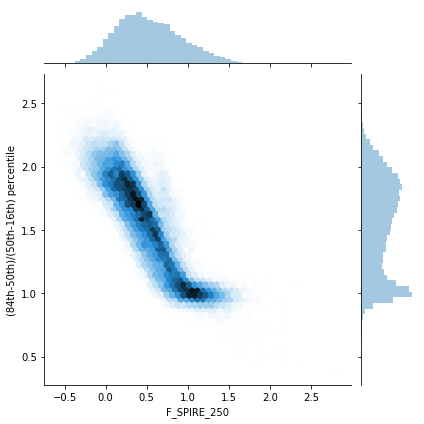

In [4]:
skew=(cat['FErr_SPIRE_250_u']-cat['F_SPIRE_250'])/(cat['F_SPIRE_250']-cat['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_250']),y=skew, kind='hex')

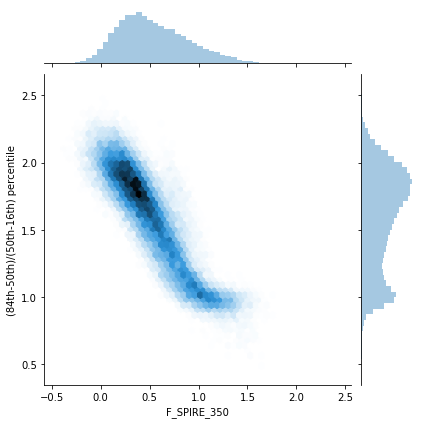

In [5]:
skew=(cat['FErr_SPIRE_350_u']-cat['F_SPIRE_350'])/(cat['F_SPIRE_350']-cat['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_350']),y=skew, kind='hex')

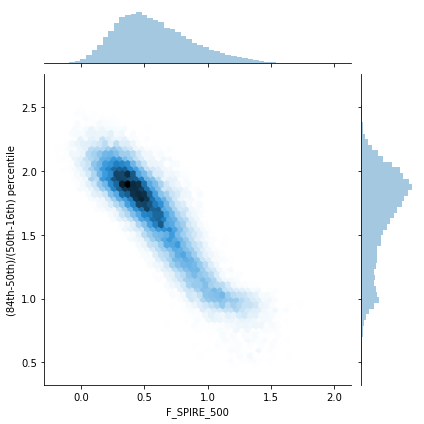

In [6]:
skew=(cat['FErr_SPIRE_500_u']-cat['F_SPIRE_500'])/(cat['F_SPIRE_500']-cat['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_500']),y=skew, kind='hex')

## Add flag to catalogue

In [7]:
from astropy.table import Column
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_250'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_350'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_500'))

In [8]:
ind_250=(cat['Pval_res_250']>0.5) | (cat['F_SPIRE_250'] < 5)
ind_350=(cat['Pval_res_350']>0.5) | (cat['F_SPIRE_350'] < 5)
ind_500=(cat['Pval_res_500']>0.5) | (cat['F_SPIRE_500'] < 6)


In [9]:
print(ind_250.sum(),ind_350.sum(),ind_500.sum(),len(cat))

25638 27524 28090 35319


In [10]:
cat['flag_spire_250'][ind_250]=True
cat['flag_spire_350'][ind_350]=True
cat['flag_spire_500'][ind_500]=True

In [12]:
cat.write('./data/dmu26_XID+SPIRE_AKARI-NEP_cat_20190312.fits', format='fits',overwrite=True)


### Check Map


In [14]:
from astropy.io import fits
import pylab as plt

In [20]:
SPIRE_pval=fits.open('./data/dmu26_XID+SPIRE_psw_AKARI-NEP_Bayes_Pval.fits')


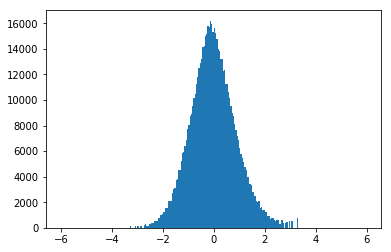

In [21]:
plt.hist(SPIRE_pval[1].data[np.isfinite(SPIRE_pval[1].data)],bins=np.arange(-6,6,0.05));